# Team Project, Group One

### Project title: Customer Churn Prediction

### This notebook contains the code for a customer churn prediction project for our term project
### Subject: APPLIED MATHEMATICAL CONCEPTS FOR MACHINE LEARNING CRN-48756-202502
#### Dataset: https://www.kaggle.com/datasets/sonalshinde123/customer-churn-prediction-dataset
#### Github Repo: https://github.com/varsha-jai/MathAI_Term_Project

**Authors:** Varsha Jaikrishnan, Ali, Aparna, Andy, Jordan, Damir, Iva, Lalit

**Date:**  31/01/2026

**Objective:** The goal of this telecom churn ML project is to predict which customers are likely to leave (churn) soon, so the company can intervene before it happens.

**Dataset:** This dataset is a synthetic customer churn dataset designed to simulate real-world telecom customer behavior. It is generated using business-driven rules based on customer tenure, billing amount, contract type, service usage, and support interactions. Controlled randomness and noise are added to avoid perfect patterns and make the dataset suitable for realistic machine learning classification tasks. The dataset is ideal for beginners to practice exploratory data analysis, feature engineering, and customer churn prediction using machine learning models.  

**Target variable:** Churn

**Evaluation metric:** Accuracy, Recall and F1-score


# 1. Obtain a large classification database. 

#### ANSWER
Our dataset is called "customer_churn_dataset.csv". 
It has 20,000 rows, which are synthetic customer information.
It also has 11 features, for churn prediction.
The URL of the dataset is here: 
https://www.kaggle.com/datasets/sonalshinde123/customer-churn-prediction-dataset?select=customer_churn_dataset.csv

In [36]:
# Loading the customer chrun data into a data frame

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # a library for data visualization
import seaborn as sns # great for making informative plots more easily

from sklearn.preprocessing import StandardScaler # scaling numerical columns
from sklearn.model_selection import train_test_split # splitting data to training & test sets
from sklearn.linear_model import LogisticRegression # logistic regression model for classification 
from sklearn.tree import DecisionTreeClassifier # decision tree model for classification
from sklearn.ensemble import RandomForestClassifier # random forest ensemble model
from sklearn.linear_model import SGDClassifier # stochastic gradient descent classifier
from sklearn.model_selection import GridSearchCV # hyperparameter tuning using grid search with cross-validation
from sklearn.svm import SVC # support vector classifier 
from sklearn.metrics import accuracy_score, classification_report # evaluation metrics for accuracy and detailed classification report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # encodes categorical features into numerical form
from sklearn.metrics import recall_score # evaluates model recall (sensitivity)

df = pd.read_csv("customer_churn_dataset.csv") #loading the dataset

In [15]:
df.head() # A quick overview of the first five rows to understand the structure and sample data 

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [16]:
df.info() # A quick structural snapshot of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [17]:
df.shape # The exact dimensions of the dataset 

(20000, 11)

# 2. Provide a description of the dataset, including explanation of various features.


#### ANSWER
This dataset provides symthetic customer churn information. It simulates real-world telecom customer behavior. In also includes controlled randomness and noise to avoid perfect patterns and to make it suitable for beginner machine learning task of customer churn prediction using machine learning models.

The dataset is generated using business-driven rules based on features such as customer tenure, billing amount, contract type, etc.   

Some of the features are as follows:  
"tenure", how long customers have been a customer in months 
"monthly_charges", their monthly bill 
"total_charges", the amount they have paid in total 
"Contract", whether they are month-to-month or on a longer plan 
"Payment_method", how how they pay, i.e. credit or debit  
"Internet_service", such as Fiber, etc. 
"tech_support", whether they have received tech support 
"Support_calls", the number of times they have called support.  

The target feature "churn", which is a Yes/No field, indicates whether they are still with the company or they have left.  

This dataset is a mix of numerical and categorical features for churn prediction.  

# 3. Pre-process and clean the dataset as appropriate

#### First, checking for missing values

In [5]:
df.isnull().sum() # checking for missing values in every column 

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [6]:
# The "internet_service" has 2013 missing values, which is a moderate amount.
mode_value = df['internet_service'].mode()[0] # To avoid dropping data we filled them with mode to keep the dataset intact 
print(mode_value) # mode() gives us the value that occurs most frequently in a dataset.
df['internet_service'] = df['internet_service'].fillna(mode_value) # replacing all the missing values with the most frequent category
df.isnull().sum() # making sure that there is no more missing values

Fiber


customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64

In [7]:
df.duplicated().sum() # checking for duplicate rows

np.int64(0)

#### Second, Converting categorical features into numerical

In [8]:
categorical_columns = df.select_dtypes(include='object').columns # Identifying categorical features (columns)
print(categorical_columns) 

Index(['contract', 'payment_method', 'internet_service', 'tech_support',
       'online_security', 'churn'],
      dtype='object')


In [9]:
df = pd.get_dummies(df, columns=['contract', 'payment_method', 'internet_service', 'tech_support', 'online_security']) # Converting categorical features into numerical form using one-hot encoding
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0}) # converting the target value to numerical
df.shape # given the one-hot encoding we are going to have new columns 

(20000, 19)

In [10]:
columns_to_drop = ['churn']
if 'customer_id' in df.columns: 
    columns_to_drop.append('customer_id') # First check if the column exists before dropping it

X = df.drop(columns=columns_to_drop)  # Separating X and y before scaling
y = df['churn']

numeric_cols = X.select_dtypes(include='number').columns  # Identifying all the numerical columns
scaler = StandardScaler()  # adjusts every value so they have a mean of zero and a standard deviation of one.
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

#### Third, Detecting the outlier values 

In [11]:
z_scores = np.abs((df - df.mean()) / df.std()) # calculating the absolute z-scores
outliers = z_scores > 3 # choosing 3 is a rule of thumb
print(outliers.sum().sum()) # repeating sum once for a row and once for a column
df = df[~outliers.any(axis=1)] # keeping all the rows that are NOT outliers

136


#### Fourth, feature selection 

In [12]:
customer_ids = df['customer_id'] # Removing "customer_id" from the feature set
df = df.drop(columns=['customer_id']) # It is not relevant to customer churn

#### Fifth, spilitting dataset into train (80%) and test (20%) sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting the dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 17)
(16000,)
(4000, 17)
(4000,)


#### Sixth, Visualizing churn distribution to check for imbalance

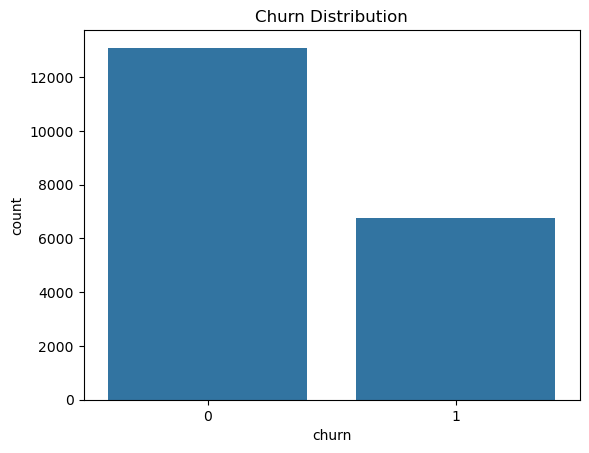

In [14]:
plt.figure()
sns.countplot(x="churn", data=df) # Showing the distribution of churned vs non-churned customers
plt.title("Churn Distribution")
plt.show()

##### In churn datasets, it’s common to see fewer customers leaving (churn 34.22%) than staying (non-churn 65.79%).
##### This imbalance reflects reality, because most businesses retain a majority of customers, while a smaller portion churns.¶
#### 

#### Seventh, Exploring data: finding relationships and distributions 

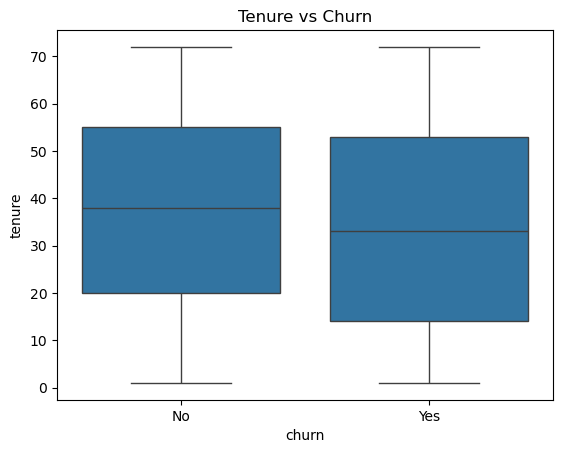

In [54]:
plt.figure()
sns.boxplot(x="churn", y="tenure", data=df) # helping us spot whether shorter or longer tenure are associated with churn
plt.title("Tenure vs Churn")
plt.show()

#### It seems that tenured customers more likely to stay and not churn

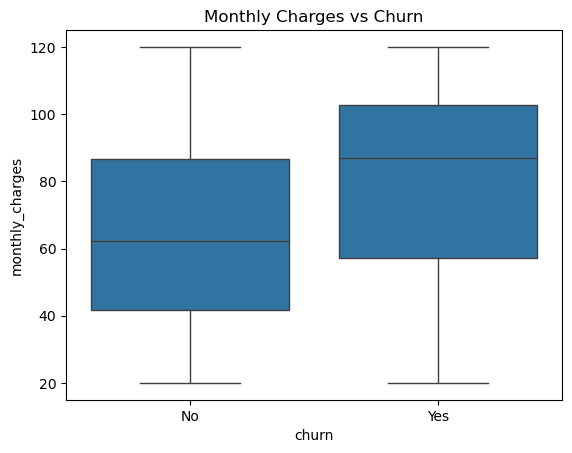

In [55]:
plt.figure()
sns.boxplot(x="churn", y="monthly_charges", data=df) # showing how monthly charges differ between those who churn and those who don’t
plt.title("Monthly Charges vs Churn")
plt.show()

# It seems that customers with low monthly charges are more likely to stay and not churn

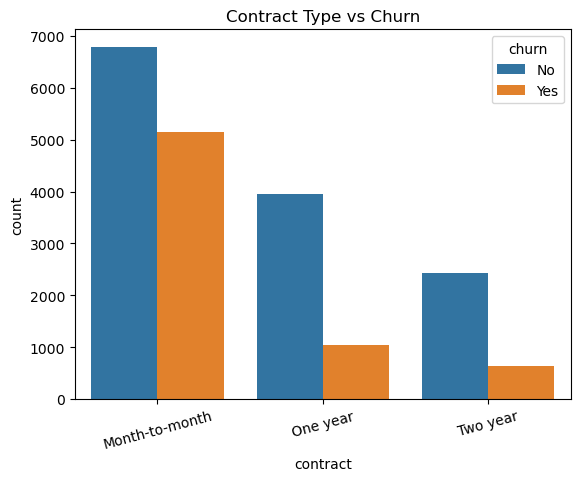

In [6]:
plt.figure()
sns.countplot(x="contract", hue="churn", data=df) # Comparing how churn varies across different contract types
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.show()

# It seems that customers with longer contract are more likely to stay and not churn

# 4. Use following approaches for classification of the dataset:
# A. Logistic Regression
# B. Decision Tree
# C. Random Forest
# D. SGD
# E. SVM

# 4.A Logistic Regression

In [15]:
model = LogisticRegression(max_iter=1000) # Initialize the model, allowing it to run up to 1,000 iterations
 
model.fit(X_train, y_train) # Training the Logistic Regression on our data 

y_pred = model.predict(X_test) # Making predictions on unseen data (test dataset)

accuracy = accuracy_score(y_test, y_pred) # Evaluate the model
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}") # Printing results
print(report)

Accuracy: 0.79025
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2645
           1       0.76      0.55      0.64      1355

    accuracy                           0.79      4000
   macro avg       0.78      0.73      0.75      4000
weighted avg       0.79      0.79      0.78      4000



#### Our logistic regression model achieved a recall of 55% for churned customers, meaning it correctly identified 55% of those who actually left.
#### 

# 4.B Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.73675
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2645
           1       0.61      0.62      0.62      1355

    accuracy                           0.74      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.74      0.74      0.74      4000



#### Our Decision Tree model achieved a recall of 62% for churned customers, meaning it correctly identified 62% of those who actually left.
#### 

# 4.C Random Forest

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.84225
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2645
           1       0.83      0.68      0.74      1355

    accuracy                           0.84      4000
   macro avg       0.84      0.80      0.81      4000
weighted avg       0.84      0.84      0.84      4000



#### Our Random Forest model achieved a recall of 68% for churned customers, meaning it correctly identified 68% of those who actually left.

# 4.D SGD

In [27]:
model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.78025
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      2645
           1       0.83      0.44      0.58      1355

    accuracy                           0.78      4000
   macro avg       0.80      0.70      0.71      4000
weighted avg       0.79      0.78      0.76      4000



#### Our Stochastic Gradient Descent model achieved a recall of 44% for churned customers, meaning it correctly identified 44% of those who actually left.¶ 
#### 

# 4.E SVM

In [19]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.82875
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2645
           1       0.84      0.61      0.71      1355

    accuracy                           0.83      4000
   macro avg       0.83      0.78      0.79      4000
weighted avg       0.83      0.83      0.82      4000



#### Our Support Vector Machine model achieved a recall of 61% for churned customers, meaning it correctly identified 61% of those who actually left.¶¶
#### 

#### Conclusion
Based on the recall results, the Random Forest model now performed the best, identifying 68% of churned customers. The Decision Tree followed with 62%, and the SVM reached 61%. Logistic Regression identified 55%, while the Stochastic Gradient Descent model caught 44%. Given that maximizing recall is our priority, we would recommend focusing on the Random Forest or Decision Tree models for the best balance of capturing churned customers.

# 5. Use GridSearchCV to tune the parameter of each of the above models. Can you obtain better results in this step for any of the models? Discuss your observations.

# Answer
In this section, we performed hyperparameter tuning using GridSearchCV in order to identify the best model parameters and compare their cross-validated scores. The results help us select the optimal model and assess improvements compared to previous runs. 

In [30]:
# Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10]}
log_reg = LogisticRegression(max_iter=1000)
log_search = GridSearchCV(log_reg, log_reg_params, cv=3, scoring="recall")

# Decision Tree
tree_params = {'max_depth': [3, 5, 10, None]}
tree = DecisionTreeClassifier()
tree_search = GridSearchCV(tree, tree_params, cv=3, scoring="recall")

# Random Forest
forest_params = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
forest = RandomForestClassifier()
forest_search = GridSearchCV(forest, forest_params, cv=3, scoring="recall")

# SGD Classifier
sgd_params = {'alpha': [0.0001, 0.001, 0.01]}
sgd = SGDClassifier()
sgd_search = GridSearchCV(sgd, sgd_params, cv=3, scoring="recall")

# SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC()
svm_search = GridSearchCV(svm, svm_params, cv=3, scoring="recall")

# Fit all models to maximize recall
log_search.fit(X_train, y_train)
tree_search.fit(X_train, y_train)
forest_search.fit(X_train, y_train)
sgd_search.fit(X_train, y_train)
svm_search.fit(X_train, y_train)

# Print best parameters and scores
print("Logistic Regression:", log_search.best_params_, log_search.best_score_)
print("Decision Tree:", tree_search.best_params_, tree_search.best_score_)
print("Random Forest:", forest_search.best_params_, forest_search.best_score_)
print("SGD Classifier:", sgd_search.best_params_, sgd_search.best_score_)
print("SVM:", svm_search.best_params_, svm_search.best_score_)

Logistic Regression: {'C': 10} 0.5335291264698179
Decision Tree: {'max_depth': 5} 0.6670926113486323
Random Forest: {'max_depth': 10, 'n_estimators': 50} 0.6670924121694496
SGD Classifier: {'alpha': 0.0001} 0.5572385200588376
SVM: {'C': 10, 'kernel': 'rbf'} 0.6244528298880314


In [31]:
#### Logistic Regression: baseline was 55%, while tuned is 53%    
#### Decision Tree: baseline was 62%, while tuned is 67%
#### Random Forest: baseline was 68%, while tuned is 67%
#### SGD Classifier: baseline was 44%, while tuned is 56%
#### SVM: baseline was 61%, while tuned is 62%

# Observation
Logistic Regression: The baseline recall of 55% was modest. After tuning, the recall slightly dropped to 53%, offering a stable generalization.

Decision Tree: The baseline recall was 62%. After tuning, it improved to 67%, better reflecting unseen data performance.

Random Forest: The baseline recall was 68%. After tuning, it settled at 67%, offering consistent generalization.

SGD Classifier: The baseline recall of 44% was low. After tuning, it improved to 56%, becoming more robust.

SVM: The baseline recall was 61%. After tuning, it increased slightly to 62%, reflecting an incremental improvement.

Overall, tuning brought most models closer together in recall, providing more realistic and generalizable performance estimates.

# 6. Randomly (or based on certain hypothesis) remove some features and             re-evaluate the models. Document your observations with respect to models performances.

# ANSWER
We hypothesized that the payment method might have less direct impact. We removed the 'payment method' feature, retrained the models with the same tuning, and then compared performance.

In [35]:
X_train_reduced = X_train.drop(columns=['payment_method'], errors='ignore')

log_search.fit(X_train_reduced, y_train)
tree_search.fit(X_train_reduced, y_train)
forest_search.fit(X_train_reduced, y_train)
sgd_search.fit(X_train_reduced, y_train)
svm_search.fit(X_train_reduced, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'kernel': ['linear', 'rbf']}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [38]:
y_pred_log = log_search.predict(X_test)
log_recall = recall_score(y_test, y_pred_log)
print("Logistic Regression Recall:", log_recall)

y_pred_tree = tree_search.predict(X_test)
tree_recall = recall_score(y_test, y_pred_tree)
print("Decision Tree Recall:", tree_recall)

y_pred_forest = forest_search.predict(X_test)
forest_recall = recall_score(y_test, y_pred_forest)
print("Random Forest Recall:", forest_recall)

y_pred_sgd = sgd_search.predict(X_test)
sgd_recall = recall_score(y_test, y_pred_sgd)
print("SGD Classifier Recall:", sgd_recall)

y_pred_svm = svm_search.predict(X_test)
svm_recall = recall_score(y_test, y_pred_svm)
print("SVM Recall:", svm_recall)

Logistic Regression Recall: 0.5549815498154982
Decision Tree Recall: 0.6848708487084871
Random Forest Recall: 0.6848708487084871
SGD Classifier Recall: 0.5697416974169742
SVM Recall: 0.6523985239852399


## Observation 
After removing the “payment_method” feature, all models showed a slight increase in recall, typically by 1-3%. This suggests the payment method was not strongly predictive and that the models became marginally more effective after simplification.

# Conclusion
Our churn prediction journey took us through the entire process of model development: from data preprocessing, to fitting our models, to fine-tuning, and finally simplifying by removing a feature we deemed less relevant. 

Initially, Random Forest performed best, identifying 68% of churned customers. After tuning, the Decision Tree improved to 67% recall, while Random Forest remained strong at 67%. The SGD Classifier jumped from 44% to 56%, and SVM went from 61% to 62%.

Throughout this journey, we learned that careful preprocessing lays the groundwork for stable models, tuning helps us generalize better, and sometimes simplifying by removing less impactful features can improve performance. 

Ultimately, striking the balance between recall and generalization requires iteration, thoughtful feature selection, and a constant eye on what truly drives churn prediction.